# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# **Import dataset**
and view top 5 rows of dataset

In [2]:
link = "https://raw.githubusercontent.com/maze340/pandas/main/mushrooms.csv"
df = pd.read_csv(link, na_values=['?'])
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


# **Exploratory data analysis**

In [3]:
df.shape

(8124, 23)

We can see that there are 8124 instances and 23 attributes in the data set.

# **View summary of dataset**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

We can already make few observations here:

* There are no numerical column (continuous values) there are only categorical columns so there is no need for normalization or discretization at the preprocessing step
* Moreover, there are missing values only for the stalk-root column in the dataset. I will confirm this further.







In [5]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   4
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [6]:
for c in df.columns:    
    print(df[c].name, df[c].unique())

class ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' nan]
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


Now we can confirm that except for stalk-root column there is no missing values.

# **Preprocessing**


Let's import libraries in order to make preprocessing

In [7]:
#?- function to import own github libraries
import requests
def importOwnLib(url):
  filename = url.split('/')[-1]
  code = requests.get(url).text
  with open(filename, 'w') as f:
    f.write(code)



In [8]:
import os

importOwnLib("https://raw.githubusercontent.com/maze340/pandas/main/preprocessing.py")
from preprocessing import Preprocessing

In [9]:
#Create backup directory for each attempts
paths = ["backup_1", "backup_2", "backup_3"]
for i, path in enumerate(paths): #?- enumerate lie un index avec sa valeure
  if not os.path.exists(path):
    os.makedirs(path)
  paths[i] += '/' #?- modifie l'objet en loop
  # paths += '/' #?- ne modifie pas l'objet en loop

#We make 3 deeps copies of the dataframe for the 3 attempts
df_1, df_2, df_3 = df.copy(deep=True), df.copy(deep=True), df.copy(deep=True)

#We compute 3 differents preprocessing
prepro_1 = Preprocessing(df_1, 'B', "class", "mushroom_1", False, 0, 2, paths[0])#attempt 1
prepro_2 = Preprocessing(df_2, 'A', "class", "mushroom_2", False, 1, 3, paths[1])#attempt 2
prepro_3 = Preprocessing(df_3, 'B', "class", "mushroom_3", False, 2, 4, paths[2])#attempt 3


Let's explain what we did in preprocessing:

We have computed differents preprocessing for 3 attempts:
- For the first attempt, 
  - we have replaced missing values depending on classlabel value (option B)
  - we have computed an equal range discretization for 2 bins
- For the second attempt, 
  - we have replaced missing values depending only corresponding column values (option A)  
  - we have computed an equal frequency discretization for 3 bins
- For the third attempt, 
  - we have replaced missing values depending on classlabel value (option B)
  - we have computed a based entropy discretization for 2 bins
  
- and in the last step, we have encoded a copy of the data frame in order to use it for building model

In [10]:
prepro_1.encoded_df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


Here the encoded version data frame

In [11]:
print("Number of missing values for the original dataframe : ", df.isna().sum().sum())
print("Number of missing values for dataframe of attempt 1: ", df_1.isna().sum().sum())
print("Number of missing values for dataframe of attempt 2: ", df_2.isna().sum().sum())
print("Number of missing values for dataframe of attempt 3: ", df_3.isna().sum().sum())

Number of missing values for the original dataframe :  2480
Number of missing values for dataframe of attempt 1:  0
Number of missing values for dataframe of attempt 2:  0
Number of missing values for dataframe of attempt 3:  0


# **Split data into separate training and test set**

In [12]:
def splitData(df, train_size):
  """
  :param df: data frame
  :param train_size: float value in [0, 1] represent the proportion of the dataset to include in the train split
  :returns feature train set, feature test set, target train set, target test set
  """
  train, test = train_test_split(df, random_state=0, train_size=train_size)
  return train, test

train_1, test_1 = splitData(df_1, 0.90)
train_2, test_2 = splitData(df_2, 0.75)
train_3, test_3 = splitData(df_3, 0.60)

print("For attempt 1: train set contains ", len(train_1), " samples,", " test set size contain ", len(test_1), " samples")
print("For attempt 2: train set contains ", len(train_2), " samples,", " test set size contain ", len(test_2), " samples")
print("For attempt 3: train set contains ", len(train_3), " samples,", " test set size contain ", len(test_3), " samples")


For attempt 1: train set contains  7311  samples,  test set size contain  813  samples
For attempt 2: train set contains  6093  samples,  test set size contain  2031  samples
For attempt 3: train set contains  4874  samples,  test set size contain  3250  samples


# **Building Models**

We import libraries for building models

In [13]:
importOwnLib("https://raw.githubusercontent.com/maze340/pandas/main/naivebayes.py")
importOwnLib("https://raw.githubusercontent.com/maze340/pandas/main/treedecision.py")
from naivebayes import NaiveBayesClassifier
from treedecision import TreeDecisionClassifier


In [14]:
#Attempt 1
nb_own_1 = NaiveBayesClassifier(train_1, "class", prepro_1.enc_dec_dict, builtin=False, dir_save=paths[0])
nb_builtin_1 = NaiveBayesClassifier(train_1, "class", prepro_1.enc_dec_dict, builtin=True, dir_save=paths[0])
tree_own_1 = TreeDecisionClassifier(train_1, "class", prepro_1.enc_dec_dict, pep=False, max_depth= None, min_samples_leaf=1, builtin=False, dir_save=paths[0])
tree_builtin_1 = TreeDecisionClassifier(train_1, "class", prepro_1.enc_dec_dict, pep=False, max_depth= None, min_samples_leaf=1, builtin=True, dir_save=paths[0])
#Attempt 2
nb_own_2 = NaiveBayesClassifier(train_2, "class", prepro_2.enc_dec_dict, builtin=False, dir_save=paths[1])
nb_builtin_2 = NaiveBayesClassifier(train_2, "class", prepro_2.enc_dec_dict, builtin=True, dir_save=paths[1])
tree_own_2 = TreeDecisionClassifier(train_2, "class", prepro_2.enc_dec_dict, pep=False, max_depth= None, min_samples_leaf=0.025, builtin=False, dir_save=paths[1])
tree_builtin_2 = TreeDecisionClassifier(train_2, "class", prepro_2.enc_dec_dict, pep=False, max_depth= None, min_samples_leaf=0.025, builtin=True, dir_save=paths[1])
#Attempt 3
nb_own_3 = NaiveBayesClassifier(train_3, "class", prepro_3.enc_dec_dict, builtin=False, dir_save=paths[2])
nb_builtin_3 = NaiveBayesClassifier(train_3, "class", prepro_3.enc_dec_dict, builtin=True, dir_save=paths[2])
tree_own_3 = TreeDecisionClassifier(train_3, "class", prepro_3.enc_dec_dict, pep=True, max_depth= None, min_samples_leaf=1, builtin=False, dir_save=paths[2])
tree_builtin_3 = TreeDecisionClassifier(train_3, "class", prepro_3.enc_dec_dict, pep=True, max_depth= None, min_samples_leaf=1, builtin=True, dir_save=paths[2])


# **Evaluation**

We import library

In [15]:
importOwnLib("https://raw.githubusercontent.com/maze340/pandas/main/evaluation.py")
from evaluation import Evaluation

### Evaluation for attempt 1 

### **Confusion Matrix and Classification Report**
The confusion matrix is a tool to summarize the performance of a classification algorithm. It indicates,from left to right:
* In the first row, the number of TP (True Positive) and FP (False Positive)
* In the second row, the number of FN (False Negative) and TN (True Negative)

The classification report is another way to evaluate the performance of the classification model. Shows accuracy, recall, f1 and support scores for the model.

In [16]:
#Evaluation for Naive Bayes Model
print("---+++ Naive Bayes Model +++---")
print("+++Own Model+++")
eval_nb_own = Evaluation("class", train_1, test_1, nb_own_1, paths[0])
eval_nb_own.script()
print("+++Builtin Model+++")
eval_nb_builtin = Evaluation("class", train_1, test_1, nb_builtin_1, paths[0])
eval_nb_builtin.script()

#Evaluation for Tree Decision Model
print("---+++ Tree Decision Model +++---")
print("+++Own Model+++")
eval_tree_own = Evaluation("class", train_1, test_1, tree_own_1, paths[0])
eval_tree_own.script()
print("+++Builtin Model+++")
eval_tree_builtin = Evaluation("class", train_1, test_1, tree_builtin_1, paths[0])
eval_tree_builtin.script()

---+++ Naive Bayes Model +++---
+++Own Model+++
Train Evaluation
[[3758   26]
 [ 296 3231]]
              precision    recall  f1-score   support

           e       0.93      0.99      0.96      3784
           p       0.99      0.92      0.95      3527

    accuracy                           0.96      7311
   macro avg       0.96      0.95      0.96      7311
weighted avg       0.96      0.96      0.96      7311

Test Evaluation
[[422   2]
 [ 31 358]]
              precision    recall  f1-score   support

           e       0.93      1.00      0.96       424
           p       0.99      0.92      0.96       389

    accuracy                           0.96       813
   macro avg       0.96      0.96      0.96       813
weighted avg       0.96      0.96      0.96       813

Major Evaluation
[[  0 424]
 [  0 389]]
              precision    recall  f1-score   support

           e       0.00      0.00      0.00       424
           p       0.48      1.00      0.65       389

    accurac

### ROC Curve

Another tool for visual comparison of classification models is the ROC curve.
In the ROC curve, we will focus on the the trade-off between the true positive
rate and the false positive rate of a single point. This will give us the overall performance of the ROC curve composed of TPR and FPR at different threshold levels. 
The closer to the diagonal line, the less accurate is the model

---+++ Naive Bayes Model +++---
+++Own Model+++


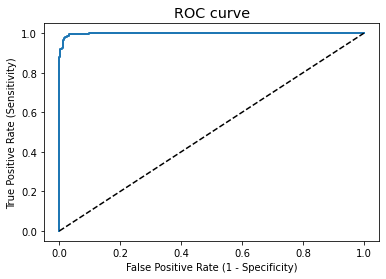

+++Builtin Model+++


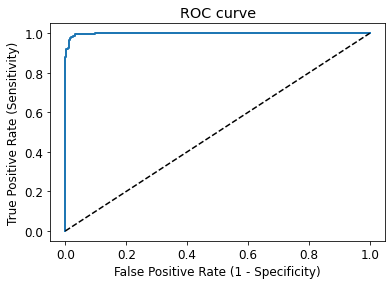

---+++ Tree Decision Model +++---
+++Own Model+++


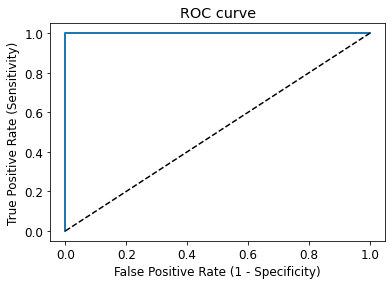

+++Builtin Model+++


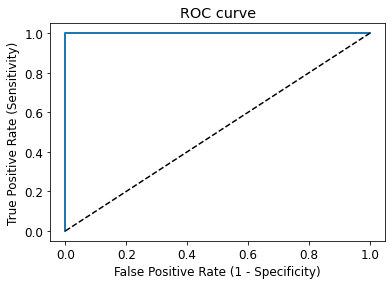

In [17]:
#ROC Curve for Naive Bayes Model
print("---+++ Naive Bayes Model +++---")
print("+++Own Model+++")
eval_nb_own.drawROCCurve('p')
print("+++Builtin Model+++")
eval_nb_builtin.drawROCCurve('p')

#ROC Curve for Tree Decision Model
print("---+++ Tree Decision Model +++---")
print("+++Own Model+++")
eval_tree_own.drawROCCurve('p')
print("+++Builtin Model+++")
eval_tree_builtin.drawROCCurve('p')

### AUC Score

The area under the ROC curve (AUC: Area UnderCurve) is a measure of the accuracy of the model. It is a technique to compare the performance of classifiers. In this technique, we measure the area under the curve (AUC). A model with perfect accuracy will have an area of 1.0, while a purely random classifier will have a ROC AUC equal to 0.5.


In [19]:
#AUC Score for Naive Bayes Model
print("---+++ Naive Bayes Model +++---")
print("+++Own Model+++")
ROC_AUC = eval_nb_own.getAUC('p')
print('ROC AUC : {0}'.format(ROC_AUC))

print("+++Builtin Model+++")
ROC_AUC = eval_nb_builtin.getAUC('p')
print('ROC AUC : {0}'.format(ROC_AUC))

#ROC Curve for Tree Decision Model
print("---+++ Tree Decision Model +++---")
print("+++Own Model+++")
ROC_AUC = eval_tree_own.getAUC('p')
print('ROC AUC : {0}'.format(ROC_AUC))

print("+++Builtin Model+++")
ROC_AUC = eval_tree_builtin.getAUC('p')
print('ROC AUC : {0}'.format(ROC_AUC))

---+++ Naive Bayes Model +++---
+++Own Model+++
0.9983811902798662
ROC AUC : None
+++Builtin Model+++
0.9983811902798662
ROC AUC : None
---+++ Tree Decision Model +++---
+++Own Model+++
1.0
ROC AUC : None
+++Builtin Model+++
1.0
ROC AUC : None


### **Interpretation for attempt 1**
ROC AUC of our models approache towards 1. So, we can conclude that our classifiers do a good job in predicting whether a mushroom is edible or poisonous.

### Evaluation for attempt 2

In [20]:
#Evaluation for Naive Bayes Model
print("---+++ Naive Bayes Model +++---")
print("+++Own Model+++")
eval_nb_own = Evaluation("class", train_2, test_2, nb_own_2, paths[1])
eval_nb_own.script()
print("+++Builtin Model+++")
eval_nb_builtin = Evaluation("class", train_2, test_2, nb_builtin_2, paths[1])
eval_nb_builtin.script()

#Evaluation for Tree Decision Model
print("---+++ Tree Decision Model +++---")
print("+++Own Model+++")
eval_tree_own = Evaluation("class", train_2, test_2, tree_own_2, paths[1])
eval_tree_own.script()
print("+++Builtin Model+++")
eval_tree_builtin = Evaluation("class", train_2, test_2, tree_builtin_2, paths[1])
eval_tree_builtin.script()

---+++ Naive Bayes Model +++---
+++Own Model+++
Train Evaluation
[[3128   19]
 [ 256 2690]]
              precision    recall  f1-score   support

           e       0.92      0.99      0.96      3147
           p       0.99      0.91      0.95      2946

    accuracy                           0.95      6093
   macro avg       0.96      0.95      0.95      6093
weighted avg       0.96      0.95      0.95      6093

Test Evaluation
[[1056    5]
 [  73  897]]
              precision    recall  f1-score   support

           e       0.94      1.00      0.96      1061
           p       0.99      0.92      0.96       970

    accuracy                           0.96      2031
   macro avg       0.96      0.96      0.96      2031
weighted avg       0.96      0.96      0.96      2031

Major Evaluation
[[   0 1061]
 [   0  970]]
              precision    recall  f1-score   support

           e       0.00      0.00      0.00      1061
           p       0.48      1.00      0.65       970

   

### ROC Curve

---+++ Naive Bayes Model +++---
+++Own Model+++


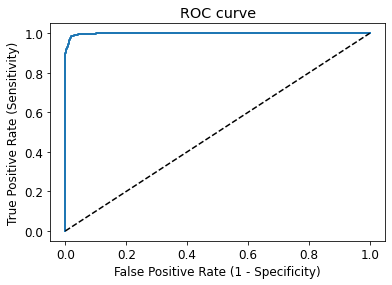

+++Builtin Model+++


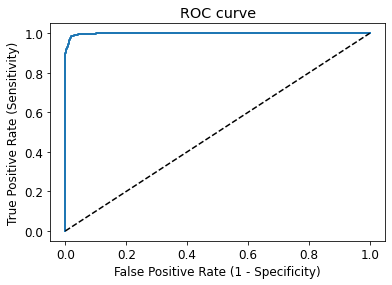

---+++ Tree Decision Model +++---
+++Own Model+++


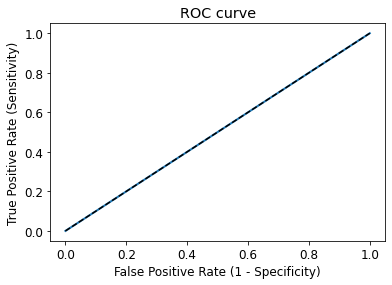

+++Builtin Model+++


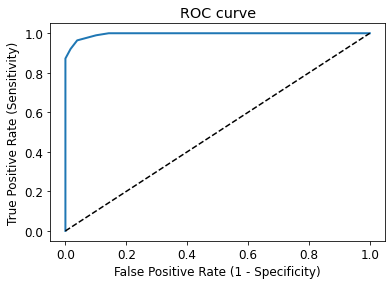

In [21]:
#ROC Curve for Naive Bayes Model
print("---+++ Naive Bayes Model +++---")
print("+++Own Model+++")
eval_nb_own.drawROCCurve('p')
print("+++Builtin Model+++")
eval_nb_builtin.drawROCCurve('p')

#ROC Curve for Tree Decision Model
print("---+++ Tree Decision Model +++---")
print("+++Own Model+++")
eval_tree_own.drawROCCurve('p')
print("+++Builtin Model+++")
eval_tree_builtin.drawROCCurve('p')

### AUC Score

In [22]:
#AUC Score for Naive Bayes Model
print("---+++ Naive Bayes Model +++---")
print("+++Own Model+++")
ROC_AUC = eval_nb_own.getAUC('p')
print('ROC AUC : {0}'.format(ROC_AUC))

print("+++Builtin Model+++")
ROC_AUC = eval_nb_builtin.getAUC('p')
print('ROC AUC : {0}'.format(ROC_AUC))

#ROC Curve for Tree Decision Model
print("---+++ Tree Decision Model +++---")
print("+++Own Model+++")
ROC_AUC = eval_tree_own.getAUC('p')
print('ROC AUC : {0}'.format(ROC_AUC))

print("+++Builtin Model+++")
ROC_AUC = eval_tree_builtin.getAUC('p')
print('ROC AUC : {0}'.format(ROC_AUC))

---+++ Naive Bayes Model +++---
+++Own Model+++
0.9984103695210703
ROC AUC : None
+++Builtin Model+++
0.9984103695210703
ROC AUC : None
---+++ Tree Decision Model +++---
+++Own Model+++
0.5
ROC AUC : None
+++Builtin Model+++
0.9953341041810391
ROC AUC : None


### **Interpretation for attempt 2**
Except for my own decision tree model, ROC AUC of our models approache towards 1. So, we can conclude that our classifiers do a good job in predicting whether a mushroom is edible or poisonous.
About my own decision tree model, we see than the ROC curve is on the diagonal line. also the ROC AUC is equal to 0.5 so in this case the model is not accurate at all.

### Evaluation for attempt 3

In [23]:
#Evaluation for Naive Bayes Model
print("---+++ Naive Bayes Model +++---")
print("+++Own Model+++")
eval_nb_own = Evaluation("class", train_3, test_3, nb_own_3, paths[2])
eval_nb_own.script()
print("+++Builtin Model+++")
eval_nb_builtin = Evaluation("class", train_3, test_3, nb_builtin_3, paths[2])
eval_nb_builtin.script()

#Evaluation for Tree Decision Model
print("---+++ Tree Decision Model +++---")
print("+++Own Model+++")
eval_tree_own = Evaluation("class", train_3, test_3, tree_own_3, paths[2])
eval_tree_own.script()
print("+++Builtin Model+++")
eval_tree_builtin = Evaluation("class", train_3, test_3, tree_builtin_3, paths[2])
eval_tree_builtin.script()

---+++ Naive Bayes Model +++---
+++Own Model+++
Train Evaluation
[[2494   15]
 [ 213 2152]]
              precision    recall  f1-score   support

           e       0.92      0.99      0.96      2509
           p       0.99      0.91      0.95      2365

    accuracy                           0.95      4874
   macro avg       0.96      0.95      0.95      4874
weighted avg       0.96      0.95      0.95      4874

Test Evaluation
[[1695    4]
 [ 119 1432]]
              precision    recall  f1-score   support

           e       0.93      1.00      0.96      1699
           p       1.00      0.92      0.96      1551

    accuracy                           0.96      3250
   macro avg       0.97      0.96      0.96      3250
weighted avg       0.96      0.96      0.96      3250

Major Evaluation
[[   0 1699]
 [   0 1551]]
              precision    recall  f1-score   support

           e       0.00      0.00      0.00      1699
           p       0.48      1.00      0.65      1551

   

### ROC Curve

---+++ Naive Bayes Model +++---
+++Own Model+++


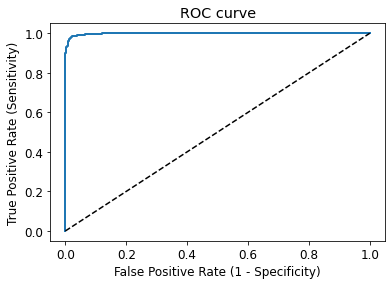

+++Builtin Model+++


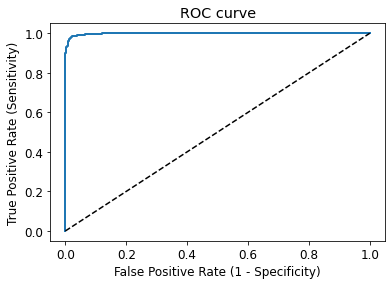

---+++ Tree Decision Model +++---
+++Own Model+++


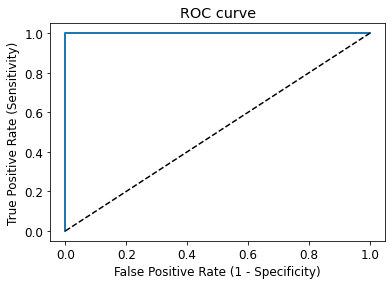

+++Builtin Model+++


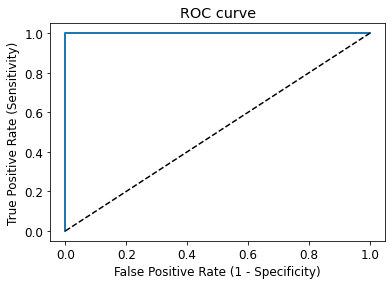

In [24]:
#ROC Curve for Naive Bayes Model
print("---+++ Naive Bayes Model +++---")
print("+++Own Model+++")
eval_nb_own.drawROCCurve('p')
print("+++Builtin Model+++")
eval_nb_builtin.drawROCCurve('p')

#ROC Curve for Tree Decision Model
print("---+++ Tree Decision Model +++---")
print("+++Own Model+++")
eval_tree_own.drawROCCurve('p')
print("+++Builtin Model+++")
eval_tree_builtin.drawROCCurve('p')

### AUC Score

In [25]:
#AUC Score for Naive Bayes Model
print("---+++ Naive Bayes Model +++---")
print("+++Own Model+++")
ROC_AUC = eval_nb_own.getAUC('p')
print('ROC AUC : {0}'.format(ROC_AUC))

print("+++Builtin Model+++")
ROC_AUC = eval_nb_builtin.getAUC('p')
print('ROC AUC : {0}'.format(ROC_AUC))

#ROC Curve for Tree Decision Model
print("---+++ Tree Decision Model +++---")
print("+++Own Model+++")
ROC_AUC = eval_tree_own.getAUC('p')
print('ROC AUC : {0}'.format(ROC_AUC))

print("+++Builtin Model+++")
ROC_AUC = eval_tree_builtin.getAUC('p')
print('ROC AUC : {0}'.format(ROC_AUC))

---+++ Naive Bayes Model +++---
+++Own Model+++
0.9983439266622115
ROC AUC : None
+++Builtin Model+++
0.9983439266622115
ROC AUC : None
---+++ Tree Decision Model +++---
+++Own Model+++
1.0
ROC AUC : None
+++Builtin Model+++
1.0
ROC AUC : None


### **Interpretation for attempt 3**
ROC AUC of our models approache towards 1. So, we can conclude that our classifiers do a good job in predicting whether a mushroom is edible or poisonous.

# **Results and conclusion**
In this project, I build: 
  * Two Gaussian Naïve Bayes Classifier models, an implemented by myself and a builtin sklearn version
  * Two Tree Decision Classifier model, an implemented by myself and a builtin sklearn version

to predict whether a mushroom is edible or poisonous.

We test these models on three attempts described above.
The models yield a very good performance as indicated by their model accuracy which was found to be around 0.96 for each models at each attempt.

The training-set accuracy score is around 0.96 while the test-set accuracy to be 0.96. These two values are quite comparable. So, there is no sign of overfitting.

ROC AUC of our models approaches towards 1. So, we can conclude that our classifier does a very good job in predicting whether a mushroom is edible or not.

# **Appendix** 
In my Project there are 7 files:
* preprocessing.py which contains the Preprocessing class in order to execute all preprocessing tasks.
* naivebayes.py which contains the NaiveBayesClassifier class in order to build
Naïve Bayes Classifier builtin and own implemented models. 
* treedecision.py which contains the TreeDecisionClassifier and Node classes in order to build Tree Decision Classifier builtin and own implemented models.
* evaluation.py which contains the Evaluation class for evaluation tasks (confusion matrix, classification report, roc curve etc...)
* proc.py contains a splitData function for splitting in train and test set and a execute function to execute the software
* parsing_perso.py for cli interface
* check_arguments.py for checking arguments and raising errors   